# Final Project: Data Exploration for Airbnb Listings and Neighborhood Similarities in NYC

---

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

## Part 1: Loading and Cleaning Data:

In [261]:
df = pd.read_csv('C:/Users/jry5/OneDrive/Desktop/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


In [262]:
df.shape

(49530, 16)

### Finding number of null values for each columns

In [263]:
df.isnull().sum()

id                                    0
name                                 18
host_id                               0
host_name                             6
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11319
reviews_per_month                 11319
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In our case, only column: "name", "last_review", "reviews_per_month" contain missing data, and those three columns are not significant, meaning that we do not care whether it is null or it has some value. Therefore, I will not drop any rows by missing values. Instead, I will replace all missing values with 0.

In [264]:
# replace NA with 0
df.fillna('0', inplace=True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Filter all listings that prices per night are less than 0 or greater than 500 USD

In [265]:
df = df[(df.price <= 500) & (df.price > 0)]
df.shape

(48372, 16)

## Part 2: Data Visualization

### Scatterplot of Airbnb Listing Based on different Boroughs

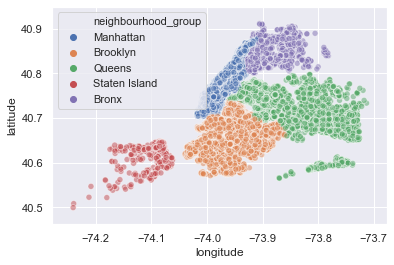

In [266]:
sns.scatterplot(x='longitude',y='latitude',data=df,alpha=0.5, hue="neighbourhood_group");

### Scatterplot of Airbnb Listing Based on Price

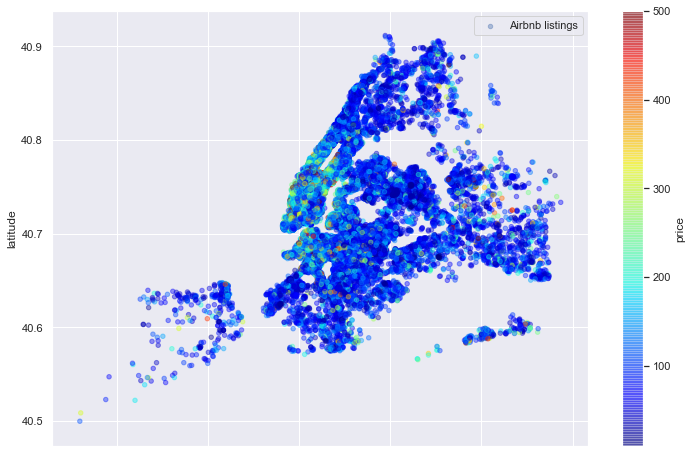

In [96]:
plot = df.plot(kind='scatter', x='longitude',y='latitude', c='price', label='Airbnb listings',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(12,8))
plot.legend()

### Compare listing prices between Manhattan and Brooklyn

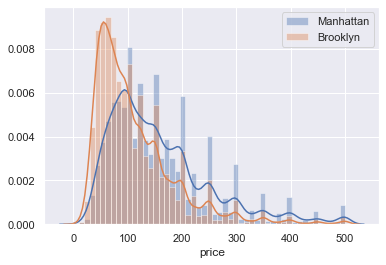

In [97]:
sns.distplot(df[df.neighbourhood_group == 'Manhattan'].price, label='Manhattan');
sns.distplot(df[df.neighbourhood_group == 'Brooklyn'].price, label='Brooklyn');
plt.legend();

### Summary Statistics of Price Group by Boroughs

In [98]:
#Brooklyn
sub_1=df.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [99]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,10.0,10.0,10.0,20.00,11.0
25%,60.0,90.0,50.0,50.00,49.0
50%,90.0,135.0,72.0,75.00,69.0
75%,145.0,200.0,109.0,109.75,100.0
max,500.0,500.0,500.0,429.00,500.0


### Boxplot and Violinplot

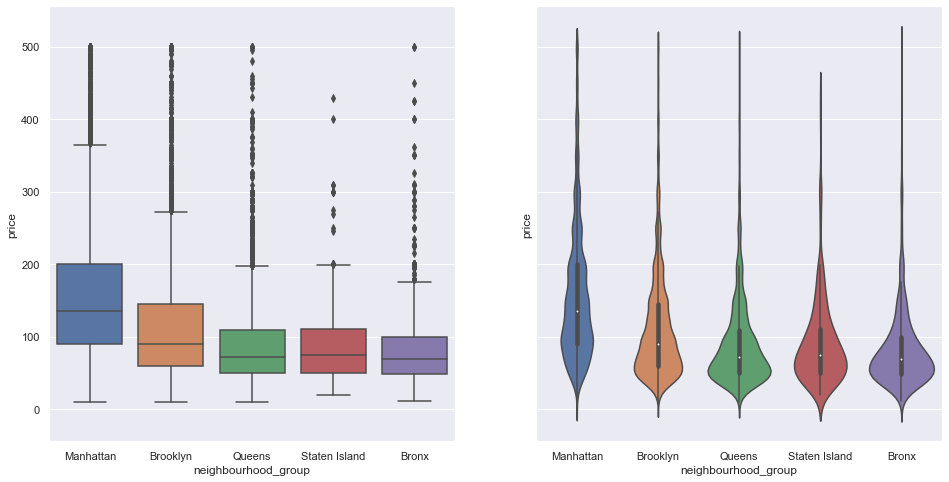

In [100]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
sns.boxplot(x='neighbourhood_group',y='price',data=df,ax=ax[0])
sns.violinplot(x='neighbourhood_group',y='price',data=df,ax=ax[1])

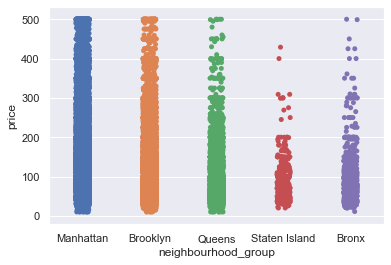

In [101]:
sns.stripplot(x='neighbourhood_group',y='price',data=df)

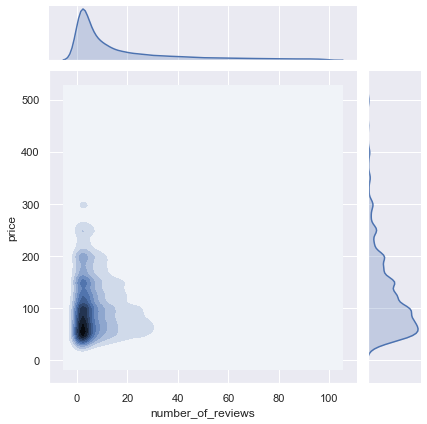

In [102]:
sns.jointplot(x='number_of_reviews',y='price',
              data=df[(df.number_of_reviews < 100) & (df.number_of_reviews > 0)],
              kind='kde')

## Part 3: Clustering and find suitable airbnb

In [103]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [109]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

### Tranform the data into a pandas dataframe

In [112]:
neighborhoods_data = newyork_data['features']

In [113]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [114]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Use geopy library to get the latitude and longitude values of Brooklyn

In [119]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


### Create a map of Brooklyn with neighborhoods superimposed on top

In [164]:
Brooklyn_data = neighborhoods[(neighborhoods['Borough'] == 'Brooklyn')|(neighborhoods['Borough'] == 'Manhattan')].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [165]:
# create map of Manhattan using latitude and longitude values
map_Brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Brooklyn_data['Latitude'], Brooklyn_data['Longitude'], Brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brooklyn)  
    
map_Brooklyn

In [166]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [167]:
# create a function to get all the neighborhoods in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [168]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
df_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                            latitudes=Brooklyn_data['Latitude'],
                            longitudes=Brooklyn_data['Longitude']
                            )
df_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym


In [169]:
# one hot encoding
df_venues_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_venues_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_venues_onehot.columns[-1]] + list(df_venues_onehot.columns[:-1])
df_venues_onehot = df_venues_onehot[fixed_columns]

df_venues_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Phy

In [170]:
df_venues_grouped = df_venues_onehot.groupby('Neighborhood').mean().reset_index()
df_venues_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Phy

### Print each neighborhood along with the top 5 most common venues

In [171]:
num_top_venues = 5

for hood in df_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = df_venues_grouped[df_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                venue  freq
0            Pharmacy  0.07
1          Donut Shop  0.05
2  Chinese Restaurant  0.05
3         Pizza Place  0.05
4     Bubble Tea Shop  0.05


----Battery Park City----
           venue  freq
0           Park  0.09
1          Hotel  0.07
2            Gym  0.06
3    Coffee Shop  0.06
4  Memorial Site  0.04


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.07
1                  Spa  0.06
2          Pizza Place  0.06
3  American Restaurant  0.04
4           Bagel Shop  0.04


----Bedford Stuyvesant----
           venue  freq
0    Coffee Shop  0.12
1            Bar  0.08
2           Café  0.08
3    Pizza Place  0.08
4  Deli / Bodega  0.04


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.15
1  Italian Restaurant  0.08
2    Sushi Restaurant  0.08
3          Donut Shop  0.08
4      Ice Cream Shop  0.08


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.29
1      Baseball F

### Create the new dataframe and display the top 10 venues for each neighborhood.

In [172]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [216]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_venues_grouped['Neighborhood']

for ind in np.arange(df_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Pharmacy,Chinese Restaurant,Pizza Place,Bubble Tea Shop,Fast Food Restaurant,Italian Restaurant,Gas Station,Donut Shop,Coffee Shop,Spanish Restaurant
1,Battery Park City,Park,Hotel,Gym,Coffee Shop,Boat or Ferry,Memorial Site,Plaza,Gourmet Shop,Shopping Mall,Food Court
2,Bay Ridge,Italian Restaurant,Spa,Pizza Place,Bar,American Restaurant,Bagel Shop,Pharmacy,Greek Restaurant,Playground,Ice Cream Shop
3,Bedford Stuyvesant,Coffee Shop,Pizza Place,Café,Bar,Deli / Bodega,Juice Bar,Gift Shop,Cocktail Bar,Wine Bar,Bagel Shop
4,Bensonhurst,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Sushi Restaurant,Donut Shop,Noodle House,Bagel Shop,Bakery,IT Services,Pizza Place


### Cluster Neighborhoods

In [217]:
# set number of clusters
kclusters = 10

df_venues_grouped_clustering = df_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 2, 1, 2, 4, 1, 9, 2, 9])

In [218]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df__merged = Brooklyn_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df__merged = df__merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


df__merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Gym,Coffee Shop,Seafood Restaurant,Tennis Stadium,Big Box Store,Supplement Shop,Steakhouse,Miscellaneous Shop,Shopping Mall,Yoga Studio
1,Brooklyn,Bay Ridge,40.625801,-74.030621,2,Italian Restaurant,Spa,Pizza Place,Bar,American Restaurant,Bagel Shop,Pharmacy,Greek Restaurant,Playground,Ice Cream Shop
2,Brooklyn,Bensonhurst,40.611009,-73.995180,2,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Sushi Restaurant,Donut Shop,Noodle House,Bagel Shop,Bakery,IT Services,Pizza Place
3,Brooklyn,Sunset Park,40.645103,-74.010316,9,Pizza Place,Latin American Restaurant,Mobile Phone Shop,Mexican Restaurant,Bank,Bakery,Pharmacy,Fried Chicken Joint,Gym,Creperie
4,Brooklyn,Greenpoint,40.730201,-73.954241,2,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Yoga Studio,Café,Mexican Restaurant,Flower Shop,French Restaurant,Deli / Bodega


In [219]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df__merged['Latitude'], df__merged['Longitude'], df__merged['Neighborhood'], df__merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [223]:
df__merged.loc[(df__merged['Cluster Labels'] == 2) & (df__merged['Borough'] == 'Manhattan'), df__merged.columns[[1] + list(range(5, df__merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Spa,Ice Cream Shop,Bubble Tea Shop,Vietnamese Restaurant,American Restaurant,Salon / Barbershop
56,Washington Heights,Café,Bakery,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Deli / Bodega,Mexican Restaurant,Bank,Tapas Restaurant,Italian Restaurant
57,Inwood,Mexican Restaurant,Café,Lounge,Restaurant,Frozen Yogurt Shop,Deli / Bodega,Caribbean Restaurant,Bakery,Spanish Restaurant,Park
58,Hamilton Heights,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Yoga Studio,Sandwich Place,Bakery,Liquor Store,Sushi Restaurant
60,Central Harlem,African Restaurant,Cosmetics Shop,American Restaurant,Seafood Restaurant,French Restaurant,Chinese Restaurant,Bar,Fried Chicken Joint,Bookstore,Beer Bar
61,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Sandwich Place,Deli / Bodega,Pizza Place,Latin American Restaurant,Donut Shop,Cocktail Bar,Restaurant
73,East Village,Bar,Pizza Place,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Italian Restaurant,Wine Bar,Korean Restaurant,Coffee Shop,Dessert Shop
74,Lower East Side,Chinese Restaurant,Japanese Restaurant,Park,Art Gallery,Ramen Restaurant,Bakery,Pizza Place,Café,Cocktail Bar,Coffee Shop
79,Manhattan Valley,Bar,Yoga Studio,Mexican Restaurant,Thai Restaurant,Pizza Place,Coffee Shop,Playground,Dog Run,Peruvian Restaurant,Deli / Bodega
81,Gramercy,Bar,Bagel Shop,Coffee Shop,Italian Restaurant,American Restaurant,Pizza Place,Grocery Store,Diner,Cocktail Bar,Playground


# Result:

### Assume I live in Kensington, Brooklyn. I want to find an Airbib in Manhattan:

1. I want to find an Airbnb in a neighborhood that has similar venues as Kensington, Brooklyn

2. The price shoud be 100-200 usd per day 

3. Number of reviews should be greater than 50

4. Since I only want to spend 3 days in Manhattan, the minimum nights should not exceed 3 days

5. availability should be 365 days

In [267]:
df_filtered = df[(df.price >= 100) & (df.price <= 200)]
df_filtered = df_filtered[df_filtered.number_of_reviews > 50]
df_filtered = df_filtered[df_filtered.minimum_nights <= 3]
df_filtered = df_filtered[df_filtered.availability_365 == 365]
df_filtered.shape

(140, 16)

In [289]:
# Find cluster of Kensington
cluster = list(df__merged.loc[df__merged.Neighborhood == 'Kensington', 'Cluster Labels'])
cluster

[2]

In [290]:
# Find Airbnb listings that match the filter condition
selected_neighborhood = list(df__merged.loc[(df__merged['Cluster Labels'] == 2) & (df__merged['Borough'] == 'Manhattan')].Neighborhood)
select = df_filtered.neighbourhood.apply(lambda x: any(item for item in selected_neighborhood if item in x))
df_filtered = df_filtered[select]
df_filtered.shape

(17, 16)

### Create map view for selected Airbnb listings

In [295]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [304]:
# create map
map_airbnb = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df_filtered['latitude'], df_filtered['longitude'], df_filtered['neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_airbnb)  
       
map_airbnb
